In [ ]:
% pip install pandas
% pip install numpy
% pip install matplotlib

In [8]:
import pandas as pd

import numpy as np
from numpy import log10,sqrt

import matplotlib.pyplot as plt

from astropy import units as u
from astropy.cosmology import Planck15
import astropy.constants as cc

from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load Leda data
di = pd.read_csv('hyperleda.csv')
df=di[(di['v3k'] <= 15000) & (di['mod0'] <= 250)]

In [ ]:
# Remove rows with missing values
df = df.dropna()

# Remove whitespace from the headers
df = df.rename(columns=lambda x: x.strip())

# Rename the objname column to galaxy
df = df.rename(columns={'objname':'galaxy'})

# Display a sample of the dataframe
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,galaxy,v3k,mod0,dl_mpc,z,d_mpc
0,0,0,0,0,0,0,0,0,0.0,PGC4689210,984.2,30.046,10.214098,0.000003,10.214064
1,1,1,1,1,1,1,1,1,1.0,NGC3522,1536.3,32.030,25.468303,0.000005,25.468172
2,2,2,2,2,2,2,2,2,2.0,NGC3951,6769.7,34.532,80.612056,0.000023,80.610236
3,3,3,3,3,3,3,3,3,3.0,IC0745,1496.2,31.287,18.088394,0.000005,18.088303
4,4,4,4,4,4,4,4,4,4.0,IC0755,1868.5,31.272,17.963874,0.000006,17.963762


In [ ]:
# Finding the luminosity distance in parsec
df['dl_mpc'] = 10**((df['mod0']+5)/5) / 1000000
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,galaxy,v3k,mod0,dl_mpc,z,d_mpc
0,0,0,0,0,0,0,0,0,0.0,PGC4689210,984.2,30.046,10.214098,0.000003,10.214064
1,1,1,1,1,1,1,1,1,1.0,NGC3522,1536.3,32.030,25.468303,0.000005,25.468172
2,2,2,2,2,2,2,2,2,2.0,NGC3951,6769.7,34.532,80.612056,0.000023,80.610236
3,3,3,3,3,3,3,3,3,3.0,IC0745,1496.2,31.287,18.088394,0.000005,18.088303
4,4,4,4,4,4,4,4,4,4.0,IC0755,1868.5,31.272,17.963874,0.000006,17.963762


In [ ]:
# Getting the redshif factor 'z'----velocity/speed of light
df['z'] = df['v3k'] / cc.c

In [ ]:
# Calculate the proper redshift etc kompensated distance in parsec
df['d_mpc'] = df['dl_mpc'] / (1+df['z'])

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,galaxy,v3k,mod0,dl_mpc,z,d_mpc
0,0,0,0,0,0,0,0,0,0.0,PGC4689210,984.2,30.046,10.214098,0.000003,10.214064
1,1,1,1,1,1,1,1,1,1.0,NGC3522,1536.3,32.030,25.468303,0.000005,25.468172
2,2,2,2,2,2,2,2,2,2.0,NGC3951,6769.7,34.532,80.612056,0.000023,80.610236
3,3,3,3,3,3,3,3,3,3.0,IC0745,1496.2,31.287,18.088394,0.000005,18.088303
4,4,4,4,4,4,4,4,4,4.0,IC0755,1868.5,31.272,17.963874,0.000006,17.963762


In [ ]:
# Save to file
df.to_csv('hyperleda.csv')

In [ ]:
def lin(x, a):
    return a * x

coeff, cov= curve_fit(lin, df['d_mpc'], df['v3k'])

# The slope of the best linear fit 
a = coeff[0]
a

67.13805058138966

In [ ]:
# Convert a from mpc based to km based
a_km = a / 1000000 / 30856775814913.67
age_sec = (1/a_km)
age_sec = age_sec
age_sec

4.596019030595299e+17

In [ ]:
# Age of the universe in years
age_year = age_sec / (60*60*24*365)
"{:,}".format(int(age_year))

'14,573,880,741'

In [ ]:
cov[0][0]

0.07924009455945481

In [ ]:
# Residual sum of squares (ss_tot)
residuals = df['v3k'] - lin(df['d_mpc'], coeff)
ss_res = np.sum(residuals**2)

# Total sum of squares (ss_tot)
ss_tot = np.sum((df['v3k']-np.mean(df['v3k']))**2)

# R squared
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.8431115461223544

In [ ]:
# Store the distance in mpc in an array
x = df['d_mpc'].values

# Store the velocity in km/s in an array
y = df['v3k'].values # v3k

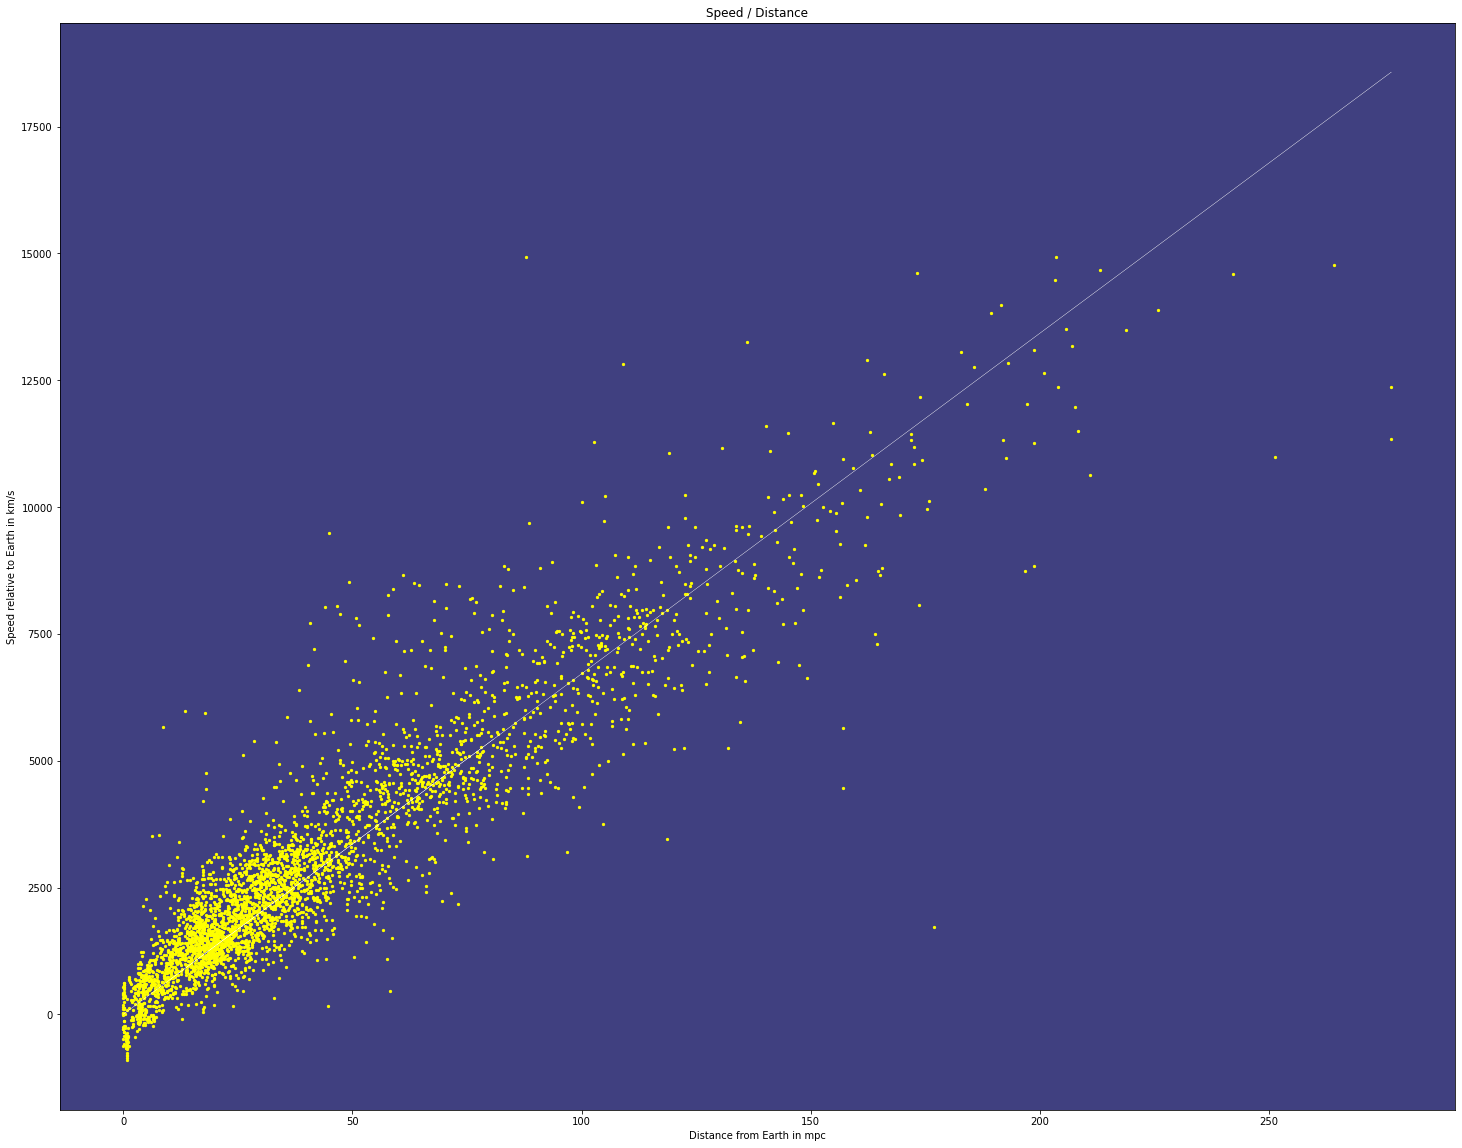

In [ ]:
# Least Square Best Fit line
f = lambda x: a * x

# Initialize plot and subplot
fig2 = plt.figure(figsize=(25,20))
g2 = fig2.add_subplot(1, 1, 1)

# Set background color to black
g2.set_facecolor((0.25, 0.25, 0.5 ))

# Plot dataset
g2.scatter(df['d_mpc'], df['v3k'], c='yellow', s=5)

# Plot best fit line
g2.plot(x,f(x), c="white", label="fit line", linewidth=0.2)

# Add labels
g2.set_title('Speed / Distance')  
g2.set_xlabel('Distance from Earth in mpc')  
g2.set_ylabel('Speed relative to Earth in km/s')  

# Show plot
plt.show()